# Laboratorio 7: 
## Predicción de Diabetes con AutoGluon 
- Descripción:
El objetivo de este ejercicio es construir, entrenar y evaluar un modelo clasificador para predecir diabetes en pacientes usando AutoGluon. Además de la práctica técnica, se busca reflexionar sobre las ventajas, limitaciones y aplicaciones del AutoML en problemas del mundo real, especialmente en contextos de salud donde la interpretación y confiabilidad de los resultados son fundamentales.

**Autores:**  
- José Rodrigo Marchena – 22398  
- Sofía Velasquez – 22049  


### 1) Carga y Descripcion de Datos

In [9]:
import pandas as pd

diabetes = pd.read_csv("./data/diabetes.csv")
print(diabetes.shape)
diabetes.describe()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Pregnancies:  Número de veces que ha estado embarazada
- GlucosePlasma:  Concentración de glucosa
- BloodPressure:  Presión de sangre diastólica (mm Hg)
- Skin:  Grosor del pliegue cutáneo del Triscep (mm)
- Insulin:  Suero de insulina 2-Horas (mu U/ml)
- BMI:  Indice de masa corporal (peso en Kg/(estatura en mts)2)
- DiabetesPedigreeFunction:  Función de pedigree de diabetes
- Age:  Edad en años
- Outcome:  Diabetes ó no diabetes (0 ó 1)

En la descripcion de datos, podemos ver algunos valores que no concuerdan, por ejemplo BMI en 0 o glucosa en 0, que son fisicamente imposibles, por tanto se considera que son mediciones faltantes y se extraeran del conjunto de datos.


### 2) Limpieza de datos

In [ ]:
diabetes.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### 2) Analisis exploratorio

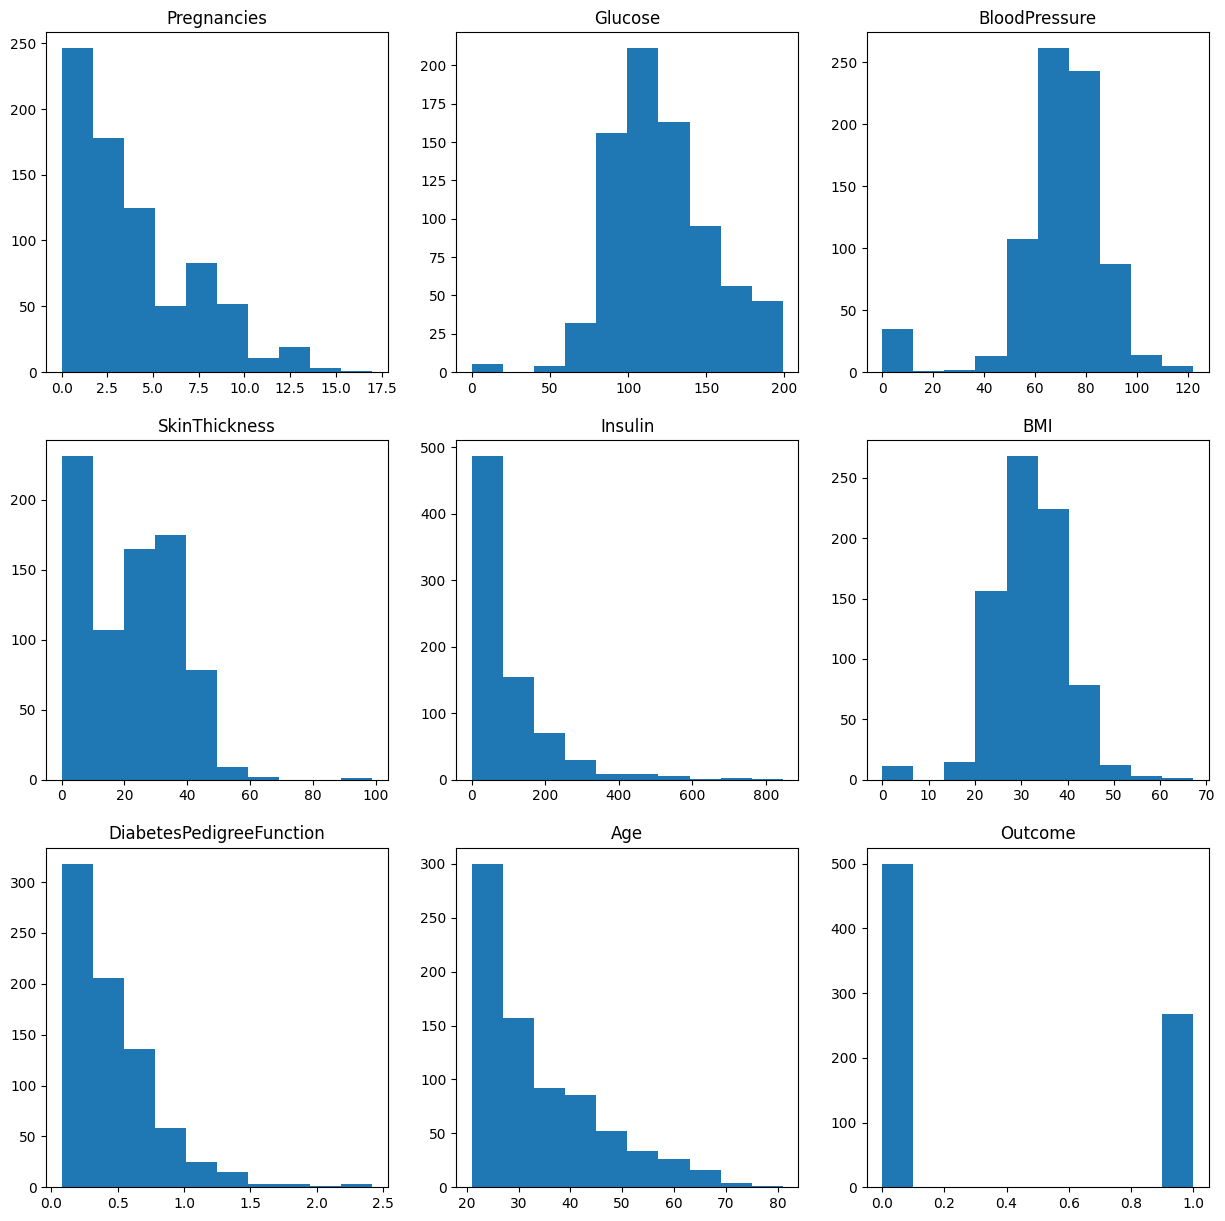

In [20]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(15,15))

for i, c in enumerate(diabetes.columns):
    cur_ax = ax[i//3][i%3]
    cur_ax.set_title(f"{c}")
    cur_ax.hist(diabetes[c])
plt.show()

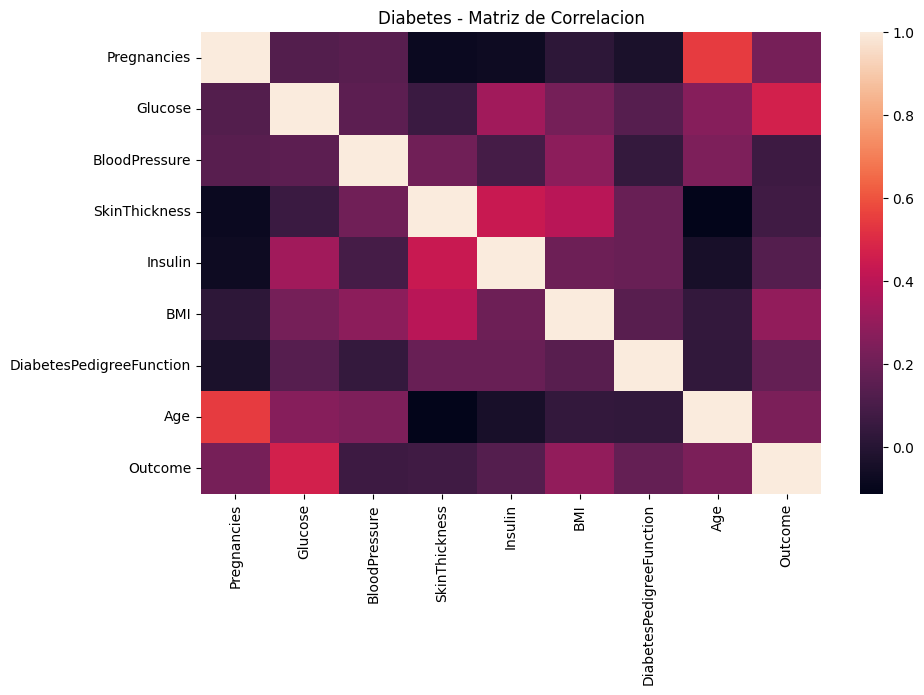

In [24]:
import seaborn as sns
corr_matrix = diabetes.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=False, fmt=".2f")
plt.title("Diabetes - Matriz de Correlacion")
plt.show()